In [1]:
#import all keys and packages for tweepy and pandas
import nltk
import numpy as np
import datetime
import tweepy
import csv
import pandas as pd
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords

sw = stopwords.words('english')

from My_API_Keys import api_key, api_key_secret, access_token, access_token_secret

In [2]:
# Authenticate the Tweepy API
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
# Grabbing the hashtag #barbz from the last 14 days 
date_since = "2020-11-01"
search_words = "#barbz" + '-filter:retweets' #filter to leave out retweets 

In [6]:
# Store the API search
tweets = tweepy.Cursor(api.search,
               tweet_mode='extended',
               q=search_words,
               lang='en', since = date_since,
                       wait_on_rate_limit=True,
                       wait_on_rate_limit_notify=True,
                       compression=True).items()

In [7]:
#Pull date, user, location, and tweet
user_info = [[item.created_at,item.user.screen_name, item.user.location, item.full_text] for item in tweets]

Rate limit reached. Sleeping for: 748
Rate limit reached. Sleeping for: 803
Rate limit reached. Sleeping for: 795
Rate limit reached. Sleeping for: 800
Rate limit reached. Sleeping for: 805


In [8]:
#Placed user info into a dataframe
barbz_text = pd.DataFrame(data=user_info, columns=['date', 'user', 'location', 'tweet'])

In [ ]:
# barbz_text
# barbz_text[:10]

In [9]:
# Convert to csv
barbz_text.to_csv('barbz_tweets.csv')

In [10]:
# Pulling tweets from df 
barbz_tw = barbz_text['tweet']
barbz_tweets = barbz_tw.value_counts()
barbz_tweets = str(barbz_tweets)

In [19]:
# Cleaning
barbz_clean = str(barbz_tweets).lower().split() # split on whitespace and shift to lowercase
barbz_clean = [w for w in barbz_clean if w.isalpha() and w not in sw] #remove stop words - english

# Descriptives
total_tokens = len(barbz_tw)
unique_tokens = len(set(barbz_clean))
text_token_len = [len(w) for w in barbz_clean]
avg_token_len = np.mean(text_token_len)
lex_diversity = len(set(barbz_clean))/len(barbz_clean)
text_counter = Counter(barbz_clean)
top_5 = text_counter.most_common(5)
top_1000 = text_counter.most_common(1000)

In [21]:
#barbz_clean
# print(total_tokens)
# print(unique_tokens)
# print(avg_token_len)
# print(lex_diversity)
# top_5

In [22]:
comment_words = '' 
stopwords = set(STOPWORDS) 

In [23]:
# iterate through the csv file 
for val in top_1000: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

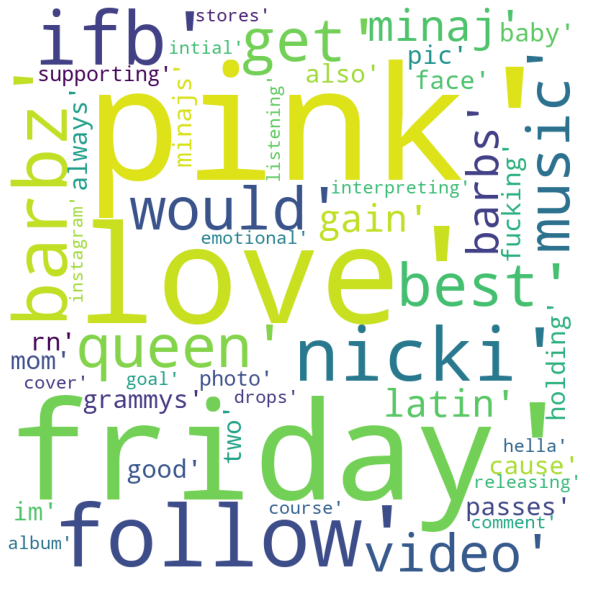

In [26]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()